<a href="https://colab.research.google.com/github/priyankav-27/CVIP_Datascience_phasetask2/blob/main/cilmateanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install xarray


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
# Step 1: Data Collection
# Assuming you have a CSV file with historical climate data
climate_data = pd.read_csv('/content/drive/My Drive/archive (2)/hourly_data.csv')
clim_data=pd.read_csv('/content/drive/My Drive/archive (2)/monthly_data.csv')


<ipython-input-86-b9df483c1489>:3: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  climate_data = pd.read_csv('/content/drive/My Drive/archive (2)/hourly_data.csv')


In [11]:
print(climate_data)

           STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0      72518014735  2015-01-01T00:51:00       FM-15       7         PRECIP   
1      72518014735  2015-01-01T01:51:00       FM-15       7         PRECIP   
2      72518014735  2015-01-01T02:51:00       FM-15       7         PRECIP   
3      72518014735  2015-01-01T03:51:00       FM-15       7         PRECIP   
4      72518014735  2015-01-01T04:51:00       FM-15       7         PRECIP   
...            ...                  ...         ...     ...            ...   
64724  72518014735  2022-05-31T19:51:00       FM-15       7         PRECIP   
64725  72518014735  2022-05-31T20:51:00       FM-15       7         PRECIP   
64726  72518014735  2022-05-31T21:51:00       FM-15       7         PRECIP   
64727  72518014735  2022-05-31T22:51:00       FM-15       7         PRECIP   
64728  72518014735  2022-05-31T23:51:00       FM-15       7         PRECIP   

       BackupElevation BackupEquipment  BackupLatitude  BackupL

In [12]:
print(climate_data.columns)

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed',
       'WindEquipmentChangeDate'],
      dtype='object')


Unique values in the column 'HourlyDryBulbTemperature':
[ 18  16  17  21  23  24  25  22  26  29  28  27  30  20  19  31  32  33
  35  36  37  38  39  40  41  42  34  15  14  13  12  11   9  10   6   4
   3   2   0  -1  -2  -4  -5  -6  -7  -3   7   8   5   1  -8 -10  -9 -12
  45  47  48  49  50  51  46  44  43  52  53  55  54  57  56  59  60  58
  61  63  65  67  66  64  62  69  70  71  68  72  74  73  75  76  77  78
 -11 -13 -14  79  81  80]


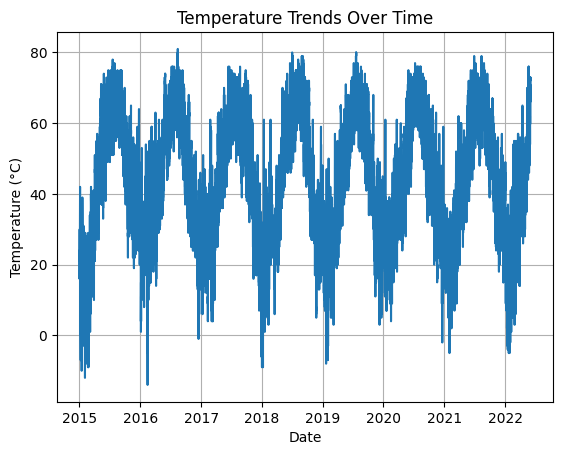

In [43]:
temperature_column = 'HourlyWetBulbTemperature'  # Replace with the correct column name
if temperature_column in climate_data:
    temperature_data = climate_data[temperature_column]
    if pd.api.types.is_numeric_dtype(temperature_data):
        print("Unique values in the column 'HourlyDryBulbTemperature':")
        print(temperature_data.unique())
        # If needed, convert the data to numeric format
        temperature_data = pd.to_numeric(temperature_data, errors='coerce')
        if not temperature_data.isnull().any():
            plt.plot(temperature_data.index, temperature_data)
            plt.title('Temperature Trends Over Time')
            plt.xlabel('Date')
            plt.ylabel('Temperature (°C)')
            plt.grid(True)
            plt.show()
        else:
            print("Column contains non-numeric or missing values.")
    else:
        print(f"Column '{temperature_column}' does not contain numeric data.")
else:
    print(f"Column '{temperature_column}' not found in the dataset.")


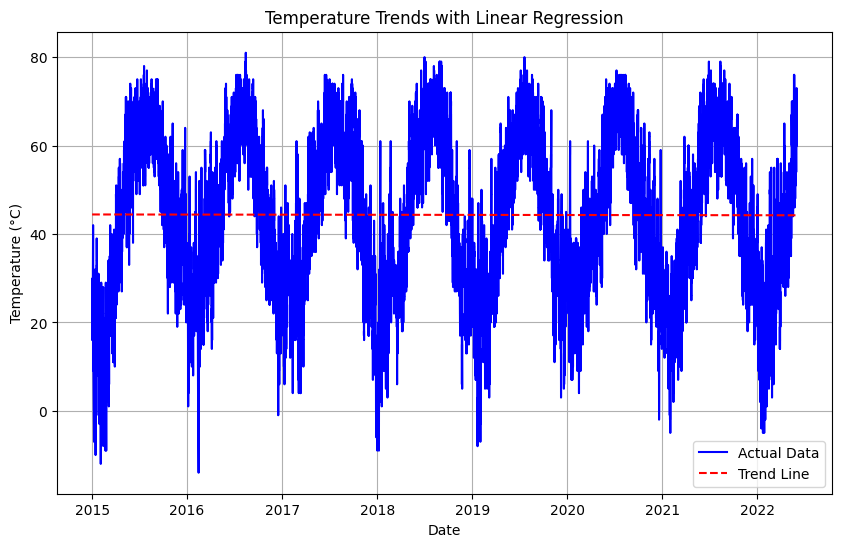

In [57]:
# Plot the temperature data and the trend line with linear regression
plt.figure(figsize=(10, 6))
plt.plot(climate_data.index, climate_data['HourlyWetBulbTemperature'], color='blue', label='Actual Data')
plt.plot(climate_data.index, trend_line, color='red', linestyle='--', label='Trend Line')
plt.title('Temperature Trends with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

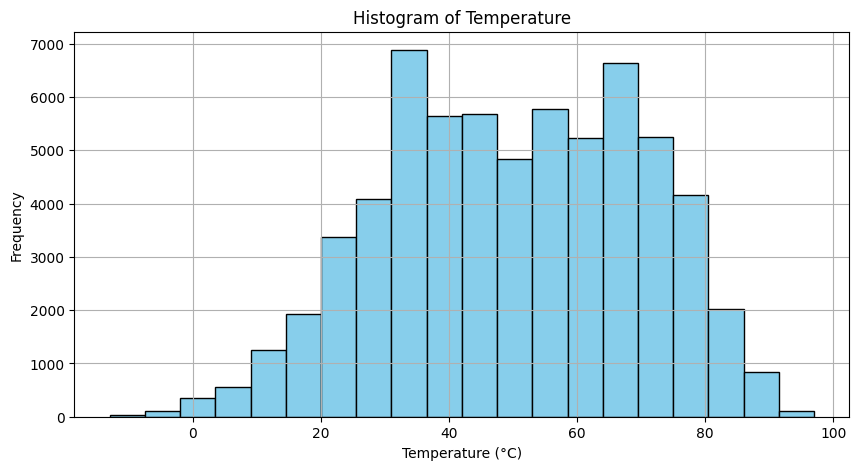

In [83]:
# Assuming 'HourlyDryBulbTemperature' is the temperature column
temperature_column = 'HourlyDryBulbTemperature'

# Convert temperature data to numeric type
temperature_data = pd.to_numeric(climate_data[temperature_column], errors='coerce')

# Filter out missing values
temperature_data = temperature_data.dropna()

# Plot histogram of temperature
plt.figure(figsize=(10, 5))
plt.hist(temperature_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


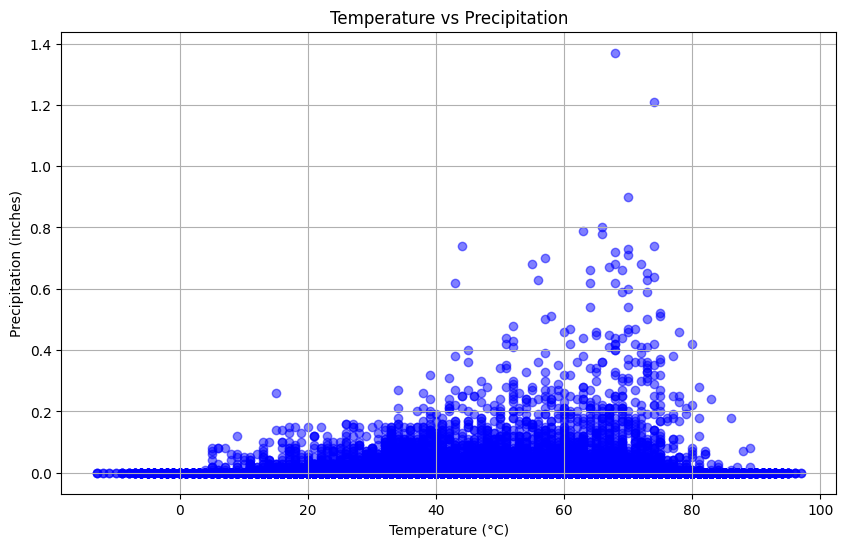

In [85]:

# Assuming 'HourlyDryBulbTemperature' is the temperature column
temperature_column = 'HourlyDryBulbTemperature'

# Assuming 'HourlyPrecipitation' is the precipitation column
precipitation_column = 'HourlyPrecipitation'

# Convert temperature and precipitation data to numeric types
climate_data[temperature_column] = pd.to_numeric(climate_data[temperature_column], errors='coerce')
climate_data[precipitation_column] = pd.to_numeric(climate_data[precipitation_column], errors='coerce')

# Drop rows with missing values in either column
climate_data.dropna(subset=[temperature_column, precipitation_column], inplace=True)

# Create scatter plot for temperature vs precipitation
plt.figure(figsize=(10, 6))
plt.scatter(climate_data[temperature_column], climate_data[precipitation_column], color='blue', alpha=0.5)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()


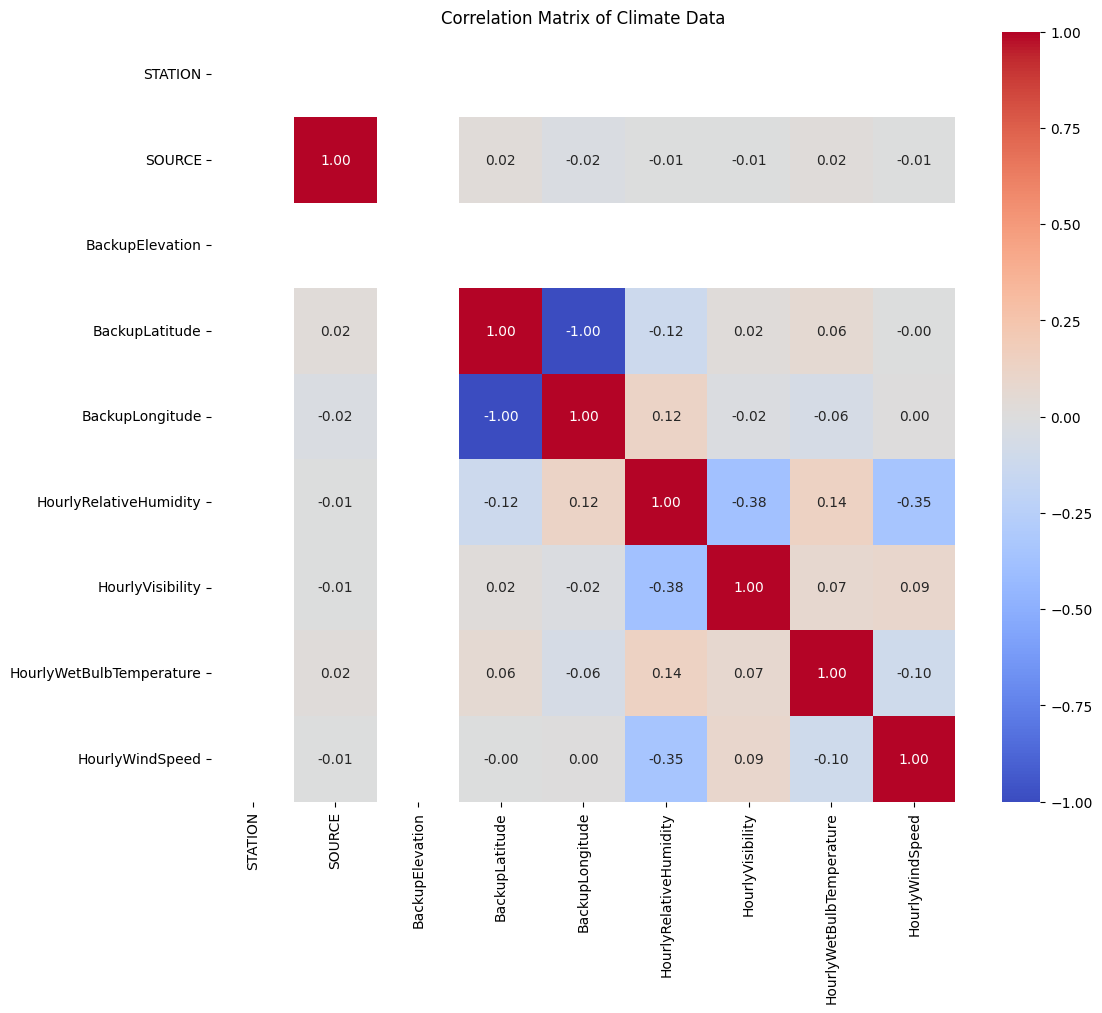

In [49]:
# Drop non-numeric columns
numeric_columns = climate_data.select_dtypes(include=['number']).columns
selected_data = climate_data[numeric_columns]

# Calculate correlation matrix for numeric columns
correlation_matrix = selected_data.corr()

# Plot correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Climate Data')
plt.show()

In [87]:
print(clim_data.columns)

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'CDSD', 'CLDD', 'DSNW', 'HDSD', 'HTDD',
       'MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip',
       'MonthlyDaysWithGT32Temp', 'MonthlyDaysWithGT90Temp',
       'MonthlyDaysWithLT0Temp', 'MonthlyDaysWithLT32Temp',
       'MonthlyDepartureFromNormalAverageTemperature',
       'MonthlyDepartureFromNormalCoolingDegreeDays',
       'MonthlyDepartureFromNormalHeatingDegreeDays',
       'MonthlyDepartureFromNormalMaximumTemperature',
       'MonthlyDepartureFromNormalMinimumTemperature',
       'MonthlyDepartureFromNormalPrecipitation', 'MonthlyGreatestPrecip',
       'MonthlyGreatestPrecipDate', 'MonthlyGreatestSnowDepth',
       'MonthlyGreatestSnowfall', 'MonthlyMaxSeaLevelPressureValue',
       'MonthlyMaxSeaLevelPressureValueDate',
       'MonthlyMaxSeaLevelPressureValueTime', 'MonthlyMaximumTemp

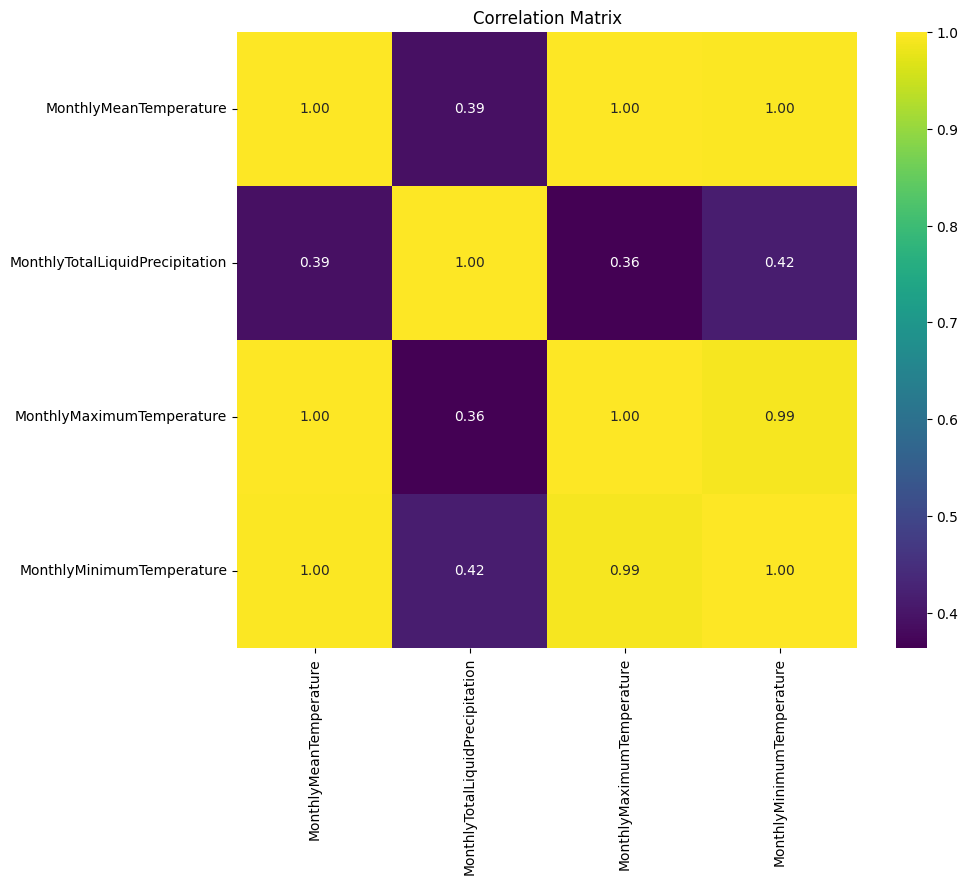

In [92]:
# Select the columns for correlation analysis
selected_columns = ['MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation', 'MonthlyMaximumTemperature', 'MonthlyMinimumTemperature']

# Filter out the selected columns
selected_data = clim_data[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()